# Expression of surface proteins

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import numpy as np
import anndata
import pandas as pd
import mudata as md
import scanpy as sc
import glob
from tqdm import tqdm
import scipy
import pertpy
import yaml

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

import process as process
import plot as plot

sys.path.append('../3_DE_analysis')
from DE_analysis_utils import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/ipykernel/kernelapp.py", lin

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/ipykernel/kernelapp.py", lin

AttributeError: _ARRAY_API not found

/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/anndata/utils.py:435: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/anndata/utils.py:435: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/anndata/utils.py:435: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/anndata/utils.py:435: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/

ModuleNotFoundError: No module named 'process'

In [14]:
from gseapy import Msigdb

msig = Msigdb()
go_gene_sets = msig.get_gmt(category= 'c5.go.cc', dbver="2025.1.Hs")
cell_surface_genes = go_gene_sets['GOCC_CELL_SURFACE']

/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/gseapy/msigdb.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/home/emmadann/miniforge3/envs/rpy2-voodoo/lib/python3.12/site-packages/gseapy/msigdb.py:95: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


In [23]:
datadir = '/mnt/oak/users/emma/data/GWT/CD4i_final/'
experiment_name = 'CD4i_final'
adata_ntc = sc.read_h5ad(f'{datadir}/{experiment_name}.NTC_subsample.h5ad', backed=True)
adata_ntc = adata_ntc[:, adata_ntc.var['gene_name'].isin(cell_surface_genes)].to_memory()
adata_ntc

AnnData object with n_obs × n_vars = 395030 × 868
    obs: 'library_id', 'lane_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'top_guide_UMI_counts', 'guide_id', 'sequence', 'perturbed_gene_name', 'perturbed_gene_id', 'guide_type', 'low_quality', 'target_lognorm_expr'
    var: 'gene_ids', 'gene_name'

In [31]:
adata_ntc.obs['culture_condition'] = adata_ntc.obs['library_id'].str.split('_').str[3]

np.int64(132436)

In [60]:
aggr_adata = sc.get.aggregate(adata_ntc, by='culture_condition', func=['sum', 'mean', 'count_nonzero'])
aggr_adata.X = aggr_adata.layers['sum'].copy()
sc.pp.normalize_total(aggr_adata)
sc.pp.log1p(aggr_adata)

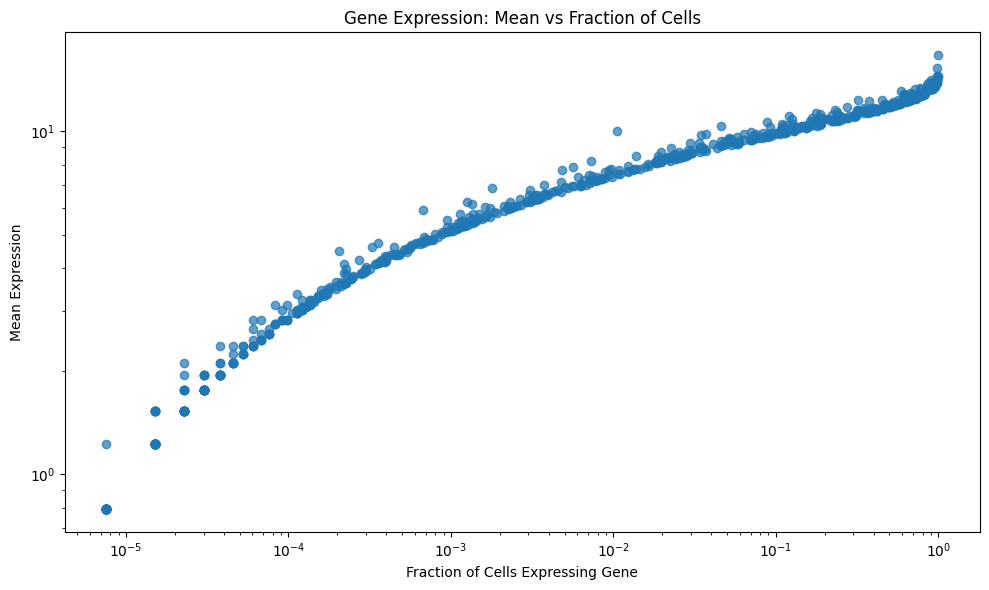

In [62]:
expr_summary = pd.DataFrame({
    'gene_name': sc.get.var_df(aggr_adata, ['gene_name'], layer='sum')['gene_name'],
    'mean_expr': sc.get.var_df(aggr_adata, ['gene_name'] + aggr_adata.obs_names.tolist())['Rest'],
    'frac_expr': sc.get.var_df(aggr_adata, ['gene_name'] + aggr_adata.obs_names.tolist(), layer='count_nonzero')['Rest'] / adata_ntc.obs['culture_condition'].value_counts()['Rest']
})

plt.figure(figsize=(10, 6))
plt.scatter(expr_summary['frac_expr'], expr_summary['mean_expr'], alpha=0.7)
plt.xlabel('Fraction of Cells Expressing Gene')
plt.ylabel('Mean Expression')
plt.title('Gene Expression: Mean vs Fraction of Cells')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [65]:
expr_summary.sort_values('frac_expr', ascending=False).to_csv('CD4_Rest_NTC_cell_surface_expr_summary.csv')